In [1]:
import h5py
import joblib
import numpy as np
from tqdm import tqdm
from pathlib import Path
from ratmoseq_extract.flip import BatchPCA

In [2]:
python_script='''
def get_flips(frames, flip):
    flip = joblib.load(flip)
    return flip.predict(frames)

def apply_flips(h5, flip_classif, smoothing=0, save=True):
    # apply flips
    with h5py.File(h5, 'a') as f:
        frames = f['frames'][:]
        flips = get_flips(
            frames, flip_classif
        )
        flip_inds = np.where(flips)
        if save:
            f['frames'][flip_inds] = np.rot90(
                frames[flip_inds], k=2, axes=(1, 2)
            )
    return flip_inds

import h5py
import joblib
import numpy as np
from tqdm import tqdm
from pathlib import Path
from ratmoseq_extract.flip import BatchPCA
flip_classif = '/n/groups/datta/jlove/data/rat_seq/rat_seq_paper/data/14weeks-flip.p'

_ = apply_flips('{file}', flip_classif, save=True)
'''

In [4]:
bash_script = '''#!/bin/env bash
#SBATCH -c 1
#SBATCH -n 1
#SBATCH --mem=64G
#SBATCH -p short
#SBATCH -t 00:30:00
#SBATCH --output=/n/groups/datta/jlove/data/rat_seq/rat_seq_paper/notebooks/fig3/flip_out/sbatch-%j.out

source $HOME/.bashrc
conda activate ratmoseq_extract
python '{script_path}'
'''

In [30]:
avis9 = list(Path('/n/groups/datta/jlove/data/rat_seq/rat_seq_paper/data/9weeks').glob('**/ir_clippedDLC_resnet50_KeypointMoSeqDLCOct18shuffle1_50000.csv'))
avis4 = list(Path('/n/groups/datta/jlove/data/rat_seq/rat_seq_paper/data/4weeks').glob('**/ir_clippedDLC_resnet50_KeypointMoSeqDLCOct18shuffle1_50000.csv'))
avis = avis9 #+ avis4
avis = [x.parents[0] / 'depth.avi' for x in avis]
exists = [x.exists() for x in avis]
assert all(exists), 'some csvs have no depth'

In [31]:
# for file in tqdm(avis, total=len(avis)):
#     result = file.parents[0] / 'proc/results_00.h5'
#     _ = apply_flips(result, flip_classif, save=True)

In [32]:
import os

In [ ]:
for avi in avis:
    result = avi.parents[0] / 'proc/results_00.h5'
    python_path = avi.parents[0] / 'proc' / 'flip.py'
    sh_path = avi.parents[0] / 'proc' / 'flip.sh'
    with open(python_path, 'w') as f:
        f.write(python_script.format(file=result))
    with open(sh_path, 'w') as f:
        f.write(bash_script.format(script_path=python_path))
    os.system(f"sbatch '{sh_path}'")

Submitted batch job 57865597
Submitted batch job 57865598
Submitted batch job 57865599
Submitted batch job 57865600
Submitted batch job 57865601
Submitted batch job 57865602
Submitted batch job 57865603
Submitted batch job 57865604
Submitted batch job 57865605
Submitted batch job 57865606
Submitted batch job 57865607
Submitted batch job 57865608
Submitted batch job 57865609
Submitted batch job 57865610
Submitted batch job 57865611
Submitted batch job 57865613
Submitted batch job 57865614
Submitted batch job 57865615
Submitted batch job 57865616
Submitted batch job 57865617
Submitted batch job 57865618
Submitted batch job 57865619
Submitted batch job 57865620
Submitted batch job 57865621
Submitted batch job 57865622
Submitted batch job 57865623
Submitted batch job 57865624
Submitted batch job 57865625
Submitted batch job 57865626
Submitted batch job 57865627
Submitted batch job 57865628
Submitted batch job 57865629
Submitted batch job 57865630
Submitted batch job 57865631
Submitted batc

# test 4,9 weeks

In [17]:
week4='/n/groups/datta/jlove/data/rat_seq/rat_seq_paper/data/4weeks/arid1b/cohort18/session_20240617101033/proc/results_00.h5'
week9='/n/groups/datta/jlove/data/rat_seq/rat_seq_paper/data/9weeks/scn2a/cohort13/session_20240726100910/proc/results_00.h5'
flip_classif = '/n/groups/datta/jlove/data/rat_seq/rat_seq_paper/data/14weeks-flip.p'

In [19]:
def get_flips(frames, flip):
    flip = joblib.load(flip)
    return flip.predict(frames)

def apply_flips(h5, flip_classif, smoothing=0, save=True):
    # apply flips
    with h5py.File(h5, 'r') as f:
        frames = f['frames'][:1000]
        flips = get_flips(
            frames, flip_classif
        )
        flip_inds = np.where(flips)
    return flip_inds

In [20]:
inds4 = apply_flips(week4, flip_classif)
inds9 = apply_flips(week9, flip_classif)

In [26]:
import matplotlib.pyplot as plt

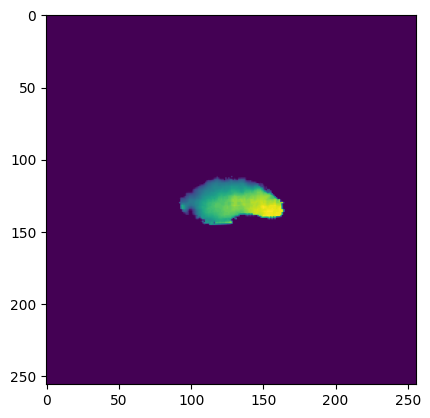

In [28]:
with h5py.File(week4, 'r') as f:
    plt.imshow(f['frames'][inds4[0][1]])

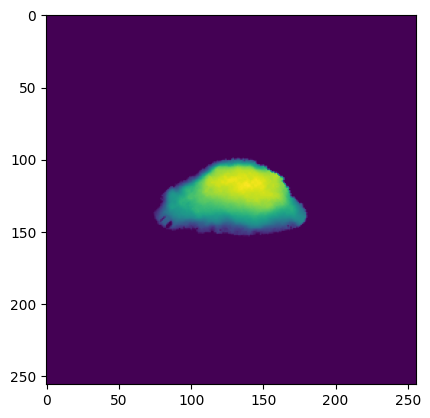

In [29]:
with h5py.File(week9, 'r') as f:
    plt.imshow(f['frames'][inds9[0][1]])